# Project - Explore Weather Trends

## Summary:
- Analyze local and global temperature data and compare the temperature trends where you live to overall global temperature trends.
- City choosed: Guarulhos - Brazil

## Database Schema:
- city_list - This contains a list of cities and countries in the database.
- city_data - This contains the average temperatures for each city by year (ºC).
- global_data - This contains the average global temperatures by year (ºC). 

## Extract Data:
- SQL query to verify the cities available from Brazil:
``` mysql
SELECT *
FROM city_list
WHERE country = 'Brazil';
```

- SQL query to extract the Guarulhos city data:
``` mysql
SELECT *
FROM city_data
WHERE city = 'Guarulhos';
```

- SQL query to extract the global data:
``` mysql
SELECT *
FROM global_data;
```

## Import Python Libraries:

In [222]:
# Import Pandas library to read and explore data
import pandas as pd

In [223]:
# Import Sklearn Preprocessing to normalize data
from sklearn import preprocessing

In [225]:
# Import Matplotlib and Seaborn Libraries to create visualization from data
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Read and Explore CSV's:

In [226]:
# Used Pandas Dataframe to read data from csv's
df_global_data = pd.read_csv('global_data.csv')
df_city_data_guarulhos = pd.read_csv('city_data_guarulhos.csv')

- Global Data:
    - We have 256 rows and 2 columns:
        - year: Value year;
        - avg_temp: Value the year average of temperature;
    - Data of years between 1750 and 2015.

- Guarulhos City Data:
    - We have 182 rows and 4 columns:
        - year: Value year;
        - city: City name;
        - country: Country name;
        - avg_temp: Value the year average of temperature;
    - Data of years between 1832 and 2013.
    - Data of avg_temp with null values from years between 1844 and 1850.

In [228]:
# Visualize global dataframe
df_global_data.head(1)

,year,avg_temp
0,1750,8.72


In [229]:
# Visualize info about global dataframe 
df_global_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [230]:
# Visualize statistics info about global dataframe
df_global_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,266.0,1882.500000,76.931788,1750.00,1816.2500,1882.500,1948.7500,2015.00
avg_temp,266.0,8.369474,0.584747,5.78,8.0825,8.375,8.7075,9.83


In [232]:
# Visualize Guarulhos city dataframe
df_city_data_guarulhos.head(1)

,year,city,country,avg_temp
0,1832,Guarulhos,Brazil,18.94


In [233]:
# Visualize info about Guarulhos city dataframe 
df_city_data_guarulhos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 4 columns):
year        182 non-null int64
city        182 non-null object
country     182 non-null object
avg_temp    175 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.8+ KB


In [234]:
# Visualize statistics info about Guarulhos city dataframe
df_city_data_guarulhos.describe().T

,count,mean,std,min,25%,50%,75%,max
year,182.0,1922.500000,52.683014,1832.00,1877.250,1922.5,1967.75,2013.0
avg_temp,175.0,19.700057,0.593897,18.28,19.245,19.7,20.09,21.3


In [235]:
# Verify and visualize rows with null values from Guarulhos city dataframe
df_city_data_guarulhos[(df_city_data_guarulhos['avg_temp'].isnull())]

,year,city,country,avg_temp
12,1844,Guarulhos,Brazil,NaN
13,1845,Guarulhos,Brazil,NaN
14,1846,Guarulhos,Brazil,NaN
15,1847,Guarulhos,Brazil,NaN
16,1848,Guarulhos,Brazil,NaN
17,1849,Guarulhos,Brazil,NaN
18,1850,Guarulhos,Brazil,NaN


## Data Prep:

- Before section visualization of data we gonna have to preparer of dataframes:
    - Adjust of years range:
        - Remove the rows with years range between 1832 and 2013 and below 1832 and above 2013, because this data is missing from Guarulhos city dataframe;
    - Create de columns with moving average temperature (window=5) from Guarulhos city and global dataframes.
    - Adjust column name.
    - Create the columns with data of temperature normalize scale, because of the scale difference of the values.
    - Join all data in one dataframe:
        - year: Values year;
        - city: City name;
        - country: Country name;
        - avg_temp_guarulhos: Values average temperature from Guarulhos city;
        - 5_year_ma_guarulhos: Values moving average temperature from Guarulhos city;
        - avg_temp_global: Values average temperature from global;
        - 5_year_ma_global: Values moving average temperature from global;
        - avg_temp_guarulhos_normalize: Values average temperature normalize from Guarulhos city;
        - avg_temp_guarulhos_normalize_5_ma: Values moving average temperature normalize from Guarulhos city;
        - avg_temp_global_normalize: Values average temperature normalize from global;
        - avg_temp_global_normalize_5_ma: Values moving average temperature normalize from global;

In [236]:
# Remove the rows with years range between 1832 and 2013 and below 1832 and above 2013 from global dataframe
df_global_data_prep = df_global_data[((df_global_data['year'] >= 1832) & (df_global_data['year'] <= 1843)) | ((df_global_data['year'] >= 1851) & (df_global_data['year'] <= 2013))].reset_index(drop=True)

In [237]:
# Remove the rows with null values from Guarulhos city dataframe
df_city_data_guarulhos_prep = df_city_data_guarulhos.dropna().reset_index(drop=True)

In [238]:
# Create the column with moving average temperature values for windows=5 from global dataframe. Used the function rolling from Pandas to calculate the moving average
df_global_data_prep['5_year_ma_global'] = df_global_data_prep.iloc[:,1].rolling(window=5).mean()

In [245]:
# Create the column with moving average temperature values for windows=5 from Guarulhos city dataframe. Used the function rolling from Pandas to calculate the moving average
df_city_data_guarulhos_prep['5_year_ma_guarulhos'] = df_city_data_guarulhos_prep.iloc[:,3].rolling(window=5).mean()

In [240]:
# Rename the column avg_temp to avg_temp_global from global dataframe
df_global_data_prep.rename(columns={'avg_temp': 'avg_temp_global'}, inplace=True)

In [241]:
# Rename the column avg_temp to avg_temp_guarulhos from Guarulhos city dataframe
df_city_data_guarulhos_prep.rename(columns={'avg_temp': 'avg_temp_guarulhos'}, inplace=True)

In [242]:
# Join the dataframes global and Guarulhos city with year column as key
df_data_join = df_city_data_guarulhos_prep.join(df_global_data_prep.set_index('year'), on='year')

In [243]:
# Use the classe preprocessing from library Sklearn to normalize scale from avg_temp_guarulhos and avg_temp_global values
y1 = df_data_join['avg_temp_guarulhos'].values
y2 = df_data_join['avg_temp_global'].values
y1 = y1.reshape(-1, 1)
y2 = y2.reshape(-1, 1)
min_max_scaler = preprocessing.MinMaxScaler()
y1_scaled = min_max_scaler.fit_transform(y1)
y2_scaled = min_max_scaler.fit_transform(y2)

In [244]:
# Create the columns with normalize scale values
df_data_join['avg_temp_guarulhos_normalize'] = y1_scaled
df_data_join['avg_temp_global_normalize'] = y2_scaled

In [246]:
# Create the column with moving average temperature values for windows=5 from global and Guarulhos city dataframes. Used the function rolling from Pandas to calculate the moving average
df_data_join['avg_temp_guarulhos_normalize_5_ma'] = df_data_join['avg_temp_guarulhos_normalize'].rolling(window=5).mean()
df_data_join['avg_temp_global_normalize_5_ma'] = df_data_join['avg_temp_global_normalize'].rolling(window=5).mean()

In [248]:
# Visualize final dataframe
df_data_join.head(5)

,year,city,country,avg_temp_guarulhos,5_year_ma_guarulhos,avg_temp_global,5_year_ma_global,avg_temp_guarulhos_normalize,avg_temp_global_normalize,avg_temp_guarulhos_normalize_5_ma,avg_temp_global_normalize_5_ma
0,1832,Guarulhos,Brazil,18.94,NaN,7.45,NaN,0.218543,0.029787,NaN,NaN
1,1833,Guarulhos,Brazil,19.93,NaN,8.01,NaN,0.546358,0.268085,NaN,NaN
2,1834,Guarulhos,Brazil,19.21,NaN,8.15,NaN,0.307947,0.327660,NaN,NaN
3,1835,Guarulhos,Brazil,18.62,NaN,7.39,NaN,0.112583,0.004255,NaN,NaN
4,1836,Guarulhos,Brazil,18.84,19.108,7.70,7.74,0.185430,0.136170,0.274172,0.153191


## Visualizations:

- Visualize 5-Years Moving Average from Global and Guarulhos city temperature

In [249]:
# Use function melt from Pandas to adjust data
df_view = df_data_join[['year', '5_year_ma_guarulhos', '5_year_ma_global']].melt('year', var_name='cols_year_ma', value_name='vals_year_ma')

In [250]:
# Define dimensions from plot
dims = (15, 5)

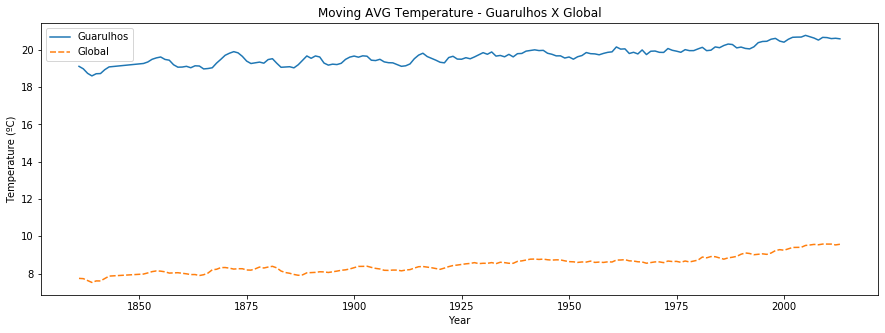

In [251]:
# Line chart plot visualization with adjust of labels. Used Matlibplot and Seaborn libraries
fig, ax = plt.subplots(figsize=dims)
sns_ax = sns.lineplot(ax=ax, x='year', y='vals_year_ma', hue='cols_year_ma', style='cols_year_ma', data=df_view)
sns_ax.set(xlabel='Year', ylabel='Temperature (ºC)', title='Moving AVG Temperature - Guarulhos X Global')
plt.legend(labels=['Guarulhos', 'Global'])
plt.show()

- Visualize 5-Years Moving Average Normalize Scale
    - Because the scale difference between global and Guarulhos average temperature is big, I decided to normalize to better visualization of trends.

In [252]:
# Use function melt from Pandas to adjust data
df_view_normalize = df_data_join[['year', 'avg_temp_guarulhos_normalize_5_ma', 'avg_temp_global_normalize_5_ma']].melt('year', var_name='cols_year_ma', value_name='vals_year_ma')

In [253]:
# Define dimensions from plot
dims = (15, 5)

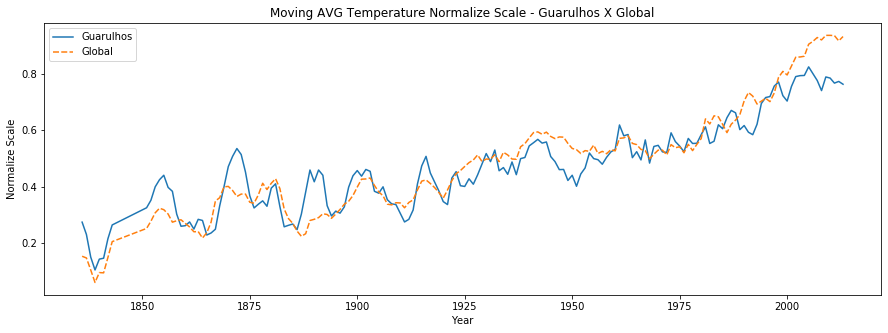

In [256]:
# Line chart plot visualization with adjust of labels. Used Matlibplot and Seaborn libraries
fig, ax = plt.subplots(figsize=dims)
sns_ax = sns.lineplot(ax=ax, x='year', y='vals_year_ma', hue='cols_year_ma', style='cols_year_ma', data=df_view_normalize)
sns_ax.set(xlabel='Year', ylabel='Normalize Scale', title='Moving AVG Temperature Normalize Scale - Guarulhos X Global')
plt.legend(labels=['Guarulhos', 'Global'])
plt.show()

## Conclusions:

- Looking at the 'Moving AVG Temperature - Guarulhos X Global' chart:
    - The Guarulhos average temperature is warmer than the global average temperature and this has been consistent over time. We can say that is almost double.
    - Over the years, the average temperatures have been rising to both.

- Looking at the 'Moving AVG Temperature Normalize Scale - Guarulhos X Global' chart:
    - We can see more clearly the tendency of temperature increase and for some time both the curves were similar.
    - But we looking the last 10 years the global curve steepened more. The world getting hotter.
    - But the Guarulhos curve change to a downward trend.

- Looking for some more information below:
    - The last 100 years the average temperature from Guarulhos increased by 2%, while the global increased by 16% the same period.
    - The last 10 years the average temperature from Guarulhos decreased by 3%, while the global increased by 1% the same period. Showing the global warming trend, but Guarulhos is in a downward trend.

In [297]:
# Get the latest data
df_data_join[['year', 'avg_temp_guarulhos', 'avg_temp_global']].tail(1)

,year,avg_temp_guarulhos,avg_temp_global
174,2013,20.07,9.61


In [298]:
# Get the row 100 ago
df_data_join[['year', 'avg_temp_guarulhos', 'avg_temp_global']].tail(101).head(1)

,year,avg_temp_guarulhos,avg_temp_global
74,1913,19.72,8.3


In [304]:
# Get the row 10 ago
df_data_join[['year', 'avg_temp_guarulhos', 'avg_temp_global']].tail(11).head(1)

,year,avg_temp_guarulhos,avg_temp_global
164,2003,20.76,9.53


In [299]:
# Get the average temperature increased at last 100 years from Guarulhos
(round(20.07/19.72, 2) - 1) * 100

2.0000000000000018

In [300]:
# Get the average temperature increased at last 100 years from global
(round(9.61/8.3, 2) - 1) * 100

15.999999999999993

In [302]:
# Get the average temperature increased at last 10 years from Guarulhos
(round(20.07/20.76, 2) - 1) * 100

-3.0000000000000027

In [303]:
# Get the average temperature increased at last 100 years from global
(round(9.61/9.53, 2) - 1) * 100

1.0000000000000009